In [104]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [125]:
df = pd.read_csv('weather.csv')
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning 

In [126]:
duplicate_cols_to_drop = ['PRCP', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'MEA', 'SNF']
filtered_df = df.drop(duplicate_cols_to_drop, axis=1)

In [127]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   DR           533 non-null     float64
 10  SPD          532 non-null     float64
 11  SND          5563 non-null    float64
 12  FT           0 non-null       float64
 13  FB           0 non-null       float64
 14  FTI          0 non-null       float64
 15  ITH          0 non-null       float64
 16  PGT          525 non-null     float64
 17  TSHDSBRSGF   34237 non-null   object 
 18  SD3          0 non-null 

In [128]:
columns = filtered_df.columns
cols_to_keep = np.where(filtered_df.isna().sum()*100/len(filtered_df) < 70)
cols_to_keep = columns[cols_to_keep]
filtered_df = filtered_df[cols_to_keep]

In [129]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.4+ MB


In [130]:
filtered_df.dropna(inplace=True)
filtered_df.drop_duplicates(inplace=True)
filtered_df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0


In [131]:
len(filtered_df)

117867

In [132]:
filtered_df['Timestamp'] = filtered_df.Date.apply(lambda x: int(pd.Timestamp(x).timestamp()))
filtered_df.drop('Date', axis=1, inplace=True)
filtered_df.Precip = filtered_df.Precip.apply(lambda x: float(x) if x != 'T' else 0)

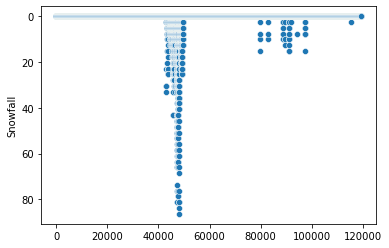

In [133]:
sns.scatterplot(filtered_df[filtered_df.Snowfall != '#VALUE!'].index, filtered_df[filtered_df.Snowfall != '#VALUE!'].Snowfall)
plt.show()

In [134]:
filtered_df.Snowfall = filtered_df.Snowfall.apply(lambda x: float(x) if x != '#VALUE!' else 0)

In [135]:
filtered_df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,Timestamp
0,10001,1.016,25.555556,22.222222,23.888889,0.0,-867974400
1,10001,0.000,28.888889,21.666667,25.555556,0.0,-867888000
2,10001,2.540,26.111111,22.222222,24.444444,0.0,-867801600
3,10001,2.540,26.666667,22.222222,24.444444,0.0,-867715200
4,10001,0.000,26.666667,21.666667,24.444444,0.0,-867628800


### EDA 

In [136]:
filtered_df.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,Timestamp
count,117867.000000,117867.000000,117867.000000,117867.000000,117867.000000,117867.000000,1.178670e+05
mean,29776.268277,3.241264,27.252595,17.967478,22.604395,0.245473,-8.104132e+08
std,21014.688483,10.839657,8.451479,8.130299,8.055395,2.626225,3.573639e+07
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,-9.467712e+08
25%,11801.000000,0.000000,25.555556,15.000000,21.111111,0.000000,-8.309088e+08
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,0.000000,-8.052480e+08
75%,33501.000000,0.762000,31.666667,23.333333,27.222222,0.000000,-7.826976e+08
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,-7.574688e+08


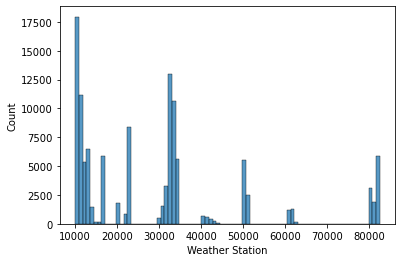

In [137]:
sns.histplot(filtered_df.STA)
plt.xlabel('Weather Station')
plt.show()

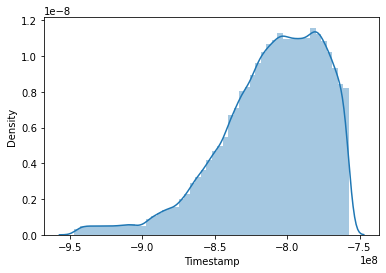

In [158]:
sns.distplot(filtered_df.Timestamp)
plt.show()

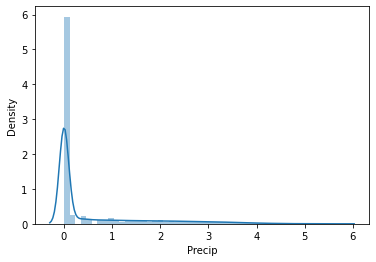

In [154]:
sns.distplot(np.log(filtered_df.Precip+1))
plt.show()

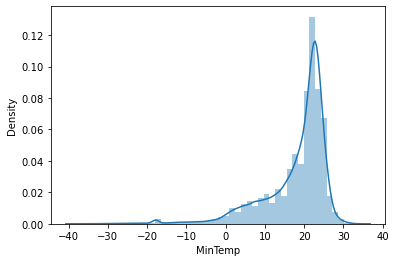

In [161]:
sns.distplot(filtered_df.MinTemp)
plt.show()

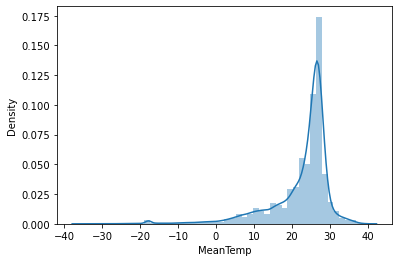

In [163]:
sns.distplot(filtered_df.MeanTemp)
plt.show()

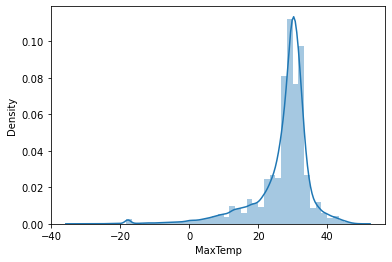

In [164]:
sns.distplot(filtered_df.MaxTemp)
plt.show()

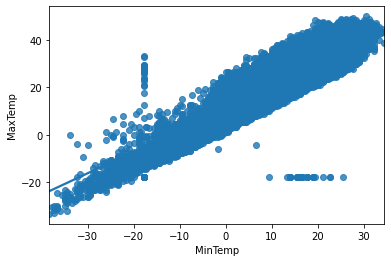

In [170]:
sns.regplot(filtered_df.MinTemp, filtered_df.MaxTemp)
plt.show()

There is noise that needs to be cleaned.

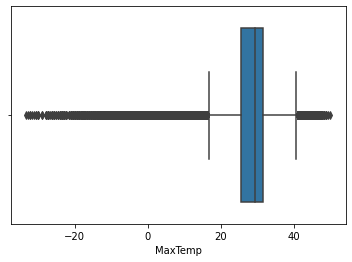

In [175]:
sns.boxplot(filtered_df.MaxTemp)
plt.show()

Interquartile range for MaxTemp column: 6.111111110000003


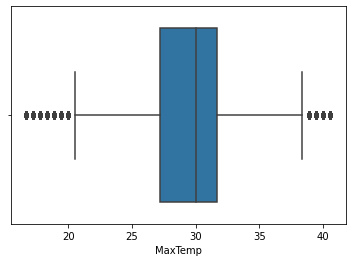

In [188]:
Q1 = filtered_df.MaxTemp.quantile(0.25)
Q3 = filtered_df.MaxTemp.quantile(0.75)
IQR = Q3-Q1
print(f'Interquartile range for MaxTemp column: {IQR}')

regression_df = filtered_df.copy()
regression_df.MaxTemp = regression_df.MaxTemp.apply(lambda x: np.nan if (x < Q1-1.5*IQR) or (x > Q3+1.5*IQR) else x)
regression_df.dropna(inplace=True)

sns.boxplot(regression_df.MaxTemp)
plt.show()

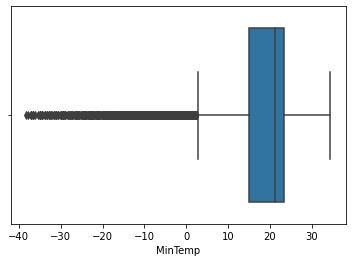

In [189]:
sns.boxplot(filtered_df.MinTemp)
plt.show()

Interquartile range for MinTemp column: 8.333333329999999


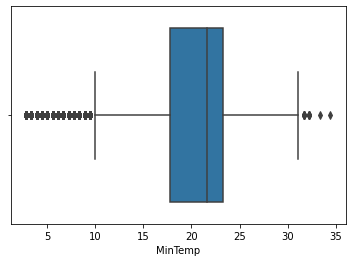

In [190]:
Q1 = filtered_df.MinTemp.quantile(0.25)
Q3 = filtered_df.MinTemp.quantile(0.75)
IQR = Q3-Q1
print(f'Interquartile range for MinTemp column: {IQR}')

regression_df.MinTemp = regression_df.MinTemp.apply(lambda x: np.nan if (x < Q1-1.5*IQR) or (x > Q3+1.5*IQR) else x)
regression_df.dropna(inplace=True)

sns.boxplot(regression_df.MinTemp)
plt.show()

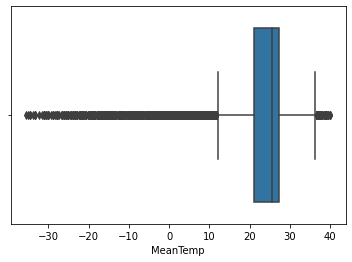

In [220]:
sns.boxplot(filtered_df.MeanTemp)
plt.show()

Interquartile range for MeanTemp column: 6.1111111099999995


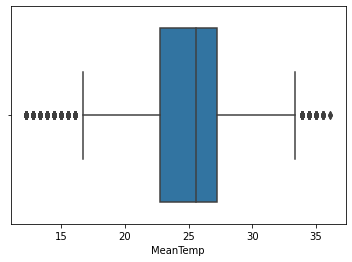

In [221]:
Q1 = filtered_df.MeanTemp.quantile(0.25)
Q3 = filtered_df.MeanTemp.quantile(0.75)
IQR = Q3-Q1
print(f'Interquartile range for MeanTemp column: {IQR}')

regression_df.MeanTemp = regression_df.MeanTemp.apply(lambda x: np.nan if (x < Q1-1.5*IQR) or (x > Q3+1.5*IQR) else x)
regression_df.dropna(inplace=True)

sns.boxplot(regression_df.MeanTemp)
plt.show()

In [222]:
x = regression_df[['MinTemp', 'MeanTemp']]
y = regression_df.MaxTemp

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [224]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [225]:
lreg.fit(x_train, y_train)

LinearRegression()

In [226]:
pd.DataFrame(lreg.coef_, x.columns, columns=['Coefficient'])

,Coefficient
MinTemp,-0.967103
MeanTemp,1.957778


In [227]:
from sklearn import metrics

In [228]:
y_pred = lreg.predict(x_test)
print(f'Mean absolute error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Mean absolute error: 0.31626225254104956
Mean squared error: 0.24843547405278524
Root mean squared error: 0.4984330186221467
